In [406]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [377]:
ela_df = pd.read_csv('ELA 2017 SD County Scale Scores gr 3,8,11.csv')
math_df = pd.read_csv('MATH 2017 SD County Scale Scores gr 3,8,11.csv')
schools_df = pd.read_csv('VOSD San Diego County Schools Dataset 2017.csv')

In [378]:
math_df.head();

In [379]:
schools_df.head();

In [380]:
schools_df;

In [381]:
print(ela_df.shape)
print(math_df.shape)
print(schools_df.shape)

(923, 16)
(923, 17)
(1000, 69)


In [382]:
print(ela_df.columns)
print(math_df.columns)
print(schools_df.columns)

Index(['County Code', 'District Code', 'School Code',
       'Total Tested At Entity Level', 'Total Tested with Scores', 'Grade',
       'Test Id', 'CAASPP Reported Enrollment', 'Students Tested',
       'Mean Scale Score', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores'],
      dtype='object')
Index(['County Code', 'District Code', 'School Code',
       'Total Tested At Entity Level', 'Total Tested with Scores', 'Grade',
       'Test Id', 'CAASPP Reported Enrollment', 'Students Tested',
       'Mean Scale Score', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Unnamed: 16'],
      dtype='object')
Index(['CDSCode', 'District', 'School', 'Street', 'StreetAbr', 'City', '*',
   

In [383]:
print(schools_df['SOCType'].nunique())
schools_df.SOCType.value_counts()

7


Elementary Schools (Public)                  445
Intermediate/Middle Schools (Public)          97
High Schools (Public)                         90
K-12 Schools (Public)                         39
Alternative Schools of Choice                 22
Elemen Schools In 1 School Dist. (Public)      1
Junior High Schools (Public)                   1
Name: SOCType, dtype: int64

In [384]:
schools_df = schools_df.drop(['StreetAbr','State','SOC'], 1)

In [385]:
hs_df = schools_df[schools_df.SOCType == 'High Schools (Public)']
hs_df.shape

(90, 66)

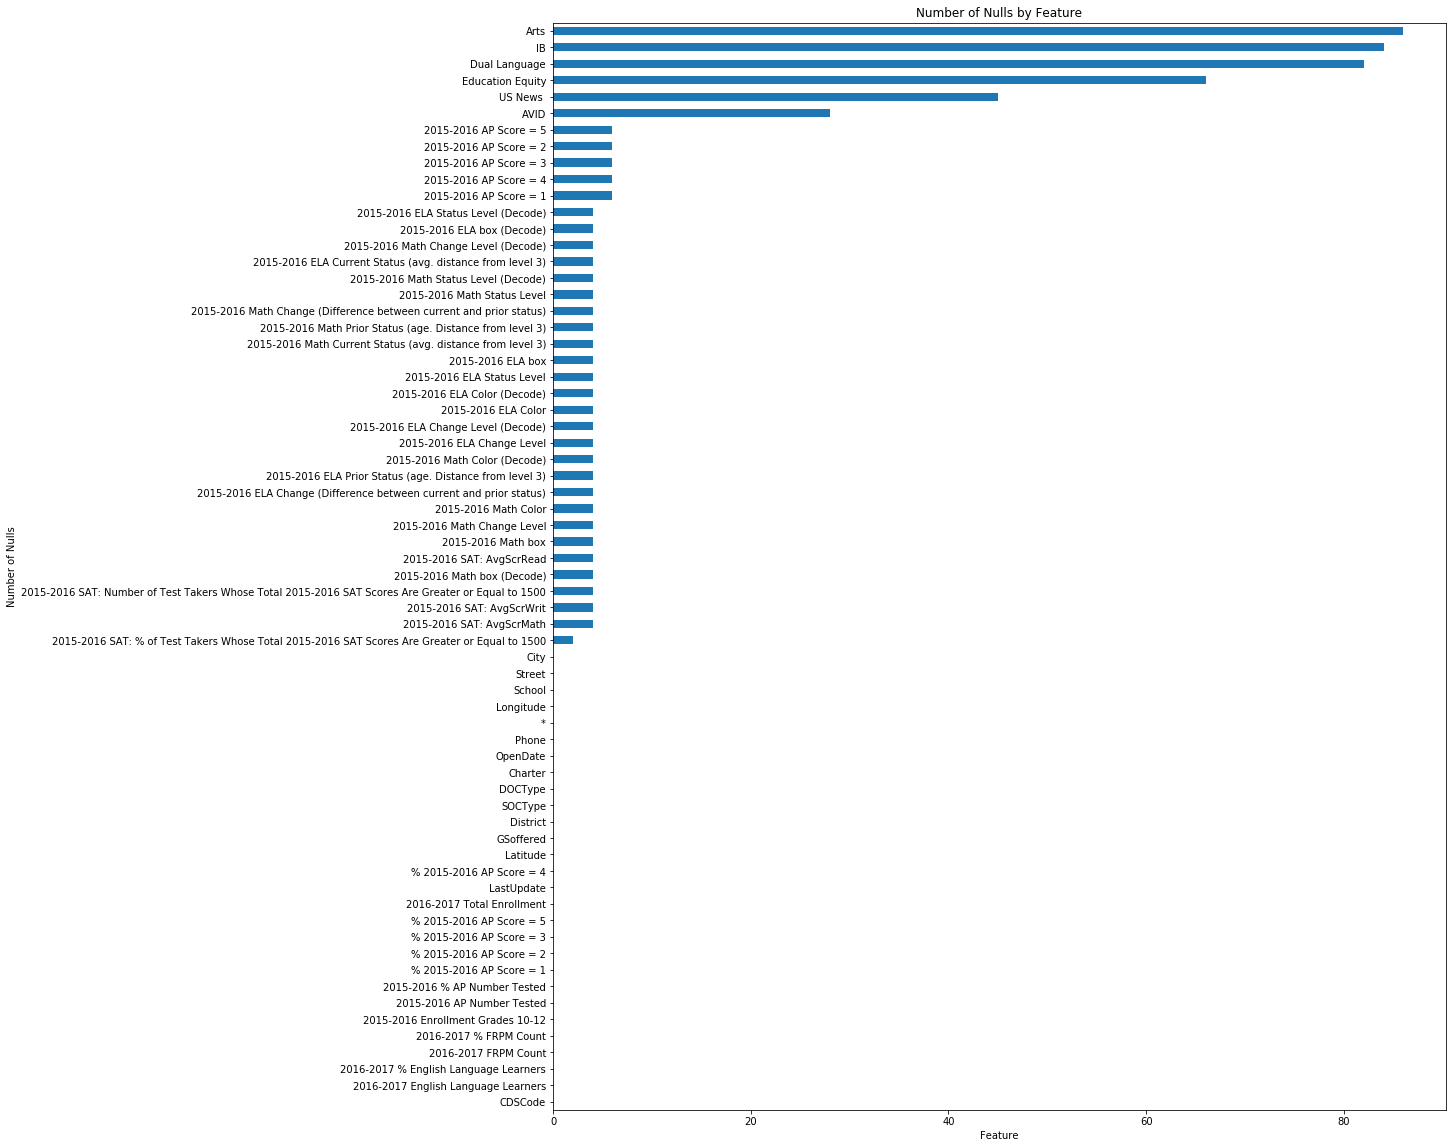

In [386]:
#Determine null values and plot according to features with most null values",
null_features = hs_df.isnull().sum()
null_features.sort_values(ascending=True).plot(kind='barh', figsize=(16,20))
plt.xlabel('Feature')
plt.ylabel('Number of Nulls')
plt.title('Number of Nulls by Feature')
plt.show()

In [387]:
## fixing syntax

df_obj = df.select_dtypes(['object'])
hs_df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
hs_df.replace(to_replace=['X','x'], value=1, inplace=True)

/Users/jillianjarrett/anaconda2/envs/py36envir/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/Users/jillianjarrett/anaconda2/envs/py36envir/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [388]:
for c in ['Dual Language', 'Education Equity', 'Arts', 'IB']:
    hs_df[c].fillna(value=0, inplace=True)

/Users/jillianjarrett/anaconda2/envs/py36envir/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


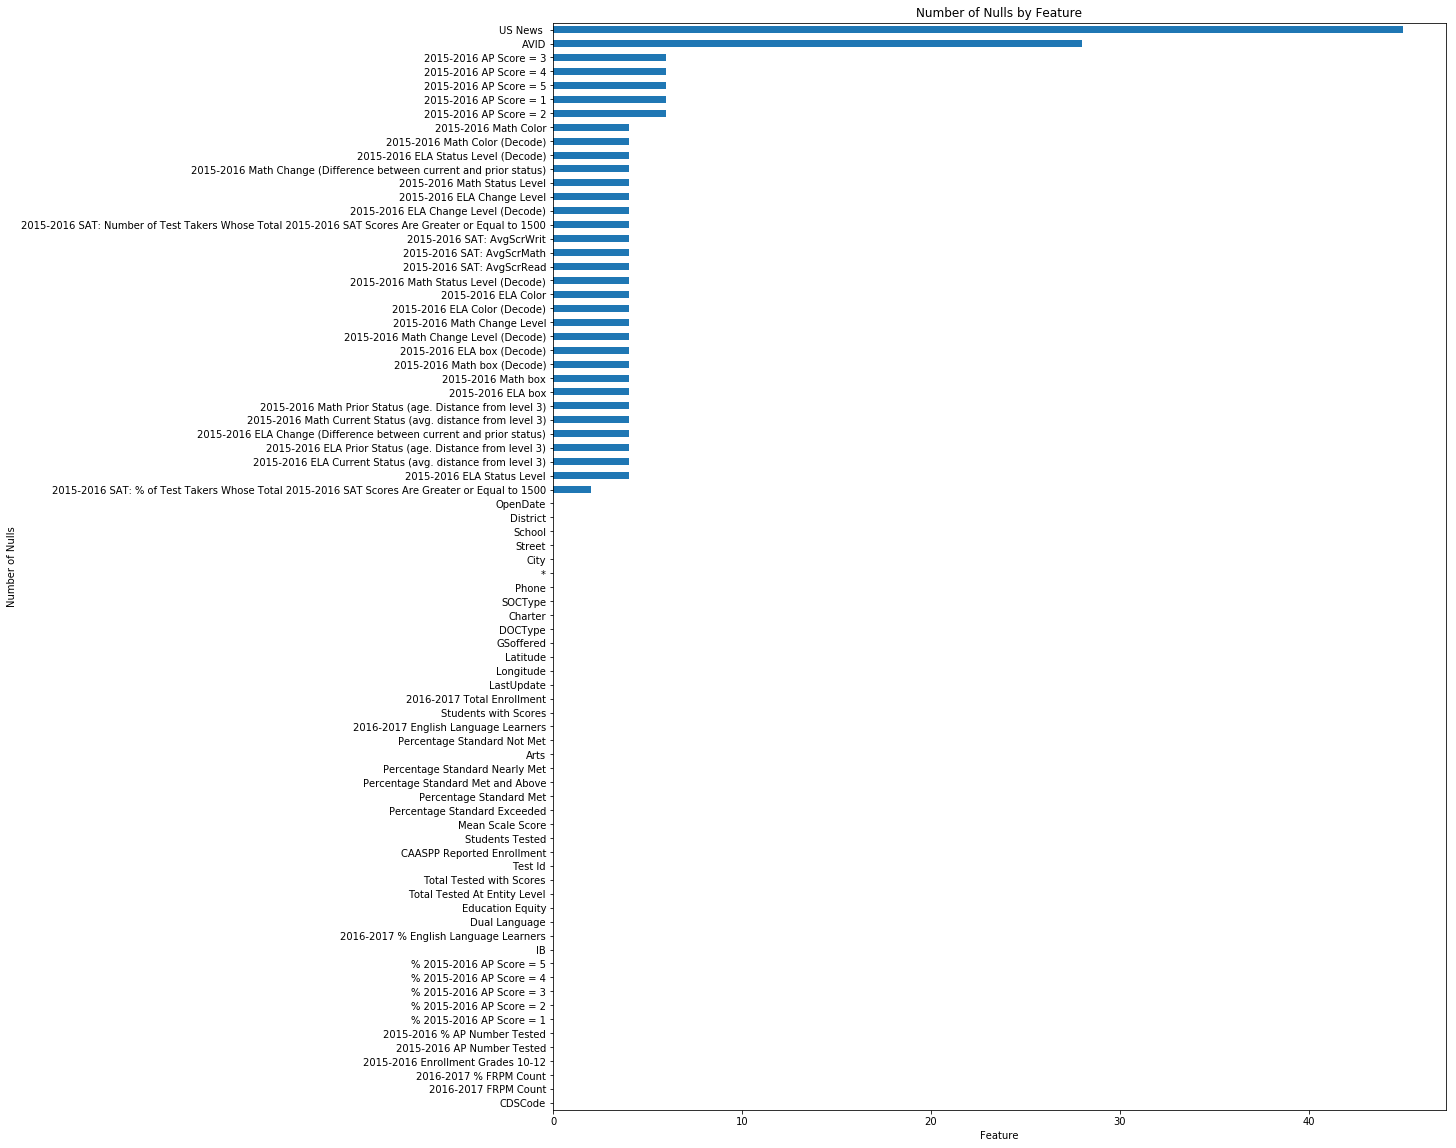

In [389]:
#Determine null values and plot according to features with most null values",
null_features = hs_df.isnull().sum()
null_features.sort_values(ascending=True).plot(kind='barh', figsize=(16,20))
plt.xlabel('Feature')
plt.ylabel('Number of Nulls')
plt.title('Number of Nulls by Feature')
plt.show()

In [390]:
#dropping columns missing more than 50% of features
all_cols = hs_df.columns
#removing features with more than 50% of missing values
hs_df = hs_df.dropna(axis =1, thresh=hs_df.shape[0]*.4)
print('Removed columns:' , set(all_cols) - set(hs_df.columns))

Removed columns: set()


### Feature Engineering

In [391]:
hs_df.columns

Index(['CDSCode', 'District', 'School', 'Street', 'City', '*', 'Phone',
       'OpenDate', 'Charter', 'DOCType', 'SOCType', 'GSoffered', 'Latitude',
       'Longitude', 'LastUpdate', '2016-2017 Total Enrollment',
       '2015-2016 ELA Current Status (avg. distance from level 3)',
       '2015-2016 ELA Prior Status (age. Distance from level 3)',
       '2015-2016 ELA Change (Difference between current and prior status)',
       '2015-2016 ELA Status Level', '2015-2016 ELA Status Level (Decode)',
       '2015-2016 ELA Change Level', '2015-2016 ELA Change Level (Decode)',
       '2015-2016 ELA Color', '2015-2016 ELA Color (Decode)',
       '2015-2016 ELA box', '2015-2016 ELA box (Decode)',
       '2015-2016 Math Current Status (avg. distance from level 3)',
       '2015-2016 Math Prior Status (age. Distance from level 3)',
       '2015-2016 Math Change (Difference between current and prior status)',
       '2015-2016 Math Status Level', '2015-2016 Math Status Level (Decode)',
       '2015

In [392]:
hs_df['2015-2016 AP Score = 1'].dtypes

dtype('O')

In [393]:
hs_df['2015-2016 AP Score = 1'].values

array([nan, '*', '17', '9', '59', '11', '25', '6', '144', '149', '179',
       '41', '83', '78', '104', '106', '112', '147', '43', '35', '119',
       '41', '58', '23', '0', '34', '237', '285', '48', '38', '51', '91',
       '48', '209', '*', '*', '74', '121', '*', '*', '99', '*', '*', nan,
       '114', '*', '*', nan, '5', '*', '49', '143', '128', '93', '14',
       '132', '176', '96', '96', '112', '*', '42', '288', '153', '33',
       '68', '97', '89', '145', '98', '*', '*', '135', '173', '346', '142',
       '290', nan, '320', '289', '140', '169', '44', '411', '507', '40',
       nan, '78', nan, '220'], dtype=object)

In [394]:
#dropping nulls (missing AP Score Data)
hs_df = hs_df[hs_df['2015-2016 AP Score = 1'].notnull()]
hs_df = hs_df[hs_df['2015-2016 AP Score = 2'].notnull()]
hs_df = hs_df[hs_df['2015-2016 AP Score = 3'].notnull()]
hs_df = hs_df[hs_df['2015-2016 AP Score = 4'].notnull()]
hs_df = hs_df[hs_df['2015-2016 AP Score = 5'].notnull()]

In [395]:
hs_df = hs_df[~hs_df['2015-2016 AP Score = 1'].str.contains('*', case=False, regex = False)]
hs_df = hs_df[~hs_df['2015-2016 AP Score = 2'].str.contains('*', case=False, regex = False)]
hs_df = hs_df[~hs_df['2015-2016 AP Score = 3'].str.contains('*', case=False, regex = False)]
hs_df = hs_df[~hs_df['2015-2016 AP Score = 4'].str.contains('*', case=False, regex = False)]
hs_df = hs_df[~hs_df['2015-2016 AP Score = 5'].str.contains('*', case=False, regex = False)]
hs_df['2015-2016 AP Score = 1'].values

array(['17', '9', '59', '11', '25', '6', '144', '149', '179', '41', '83',
       '78', '104', '106', '112', '147', '43', '35', '119', '41', '58',
       '23', '0', '34', '237', '285', '48', '38', '51', '91', '48', '209',
       '74', '121', '99', '114', '5', '49', '143', '128', '93', '14',
       '132', '176', '96', '96', '112', '42', '288', '153', '33', '68',
       '97', '89', '145', '98', '135', '173', '346', '142', '290', '320',
       '289', '140', '169', '44', '411', '507', '40', '78', '220'], dtype=object)

In [397]:
hs_df['2015-2016 AP Score = 1'] = hs_df['2015-2016 AP Score = 1'].astype(int)
hs_df['2015-2016 AP Score = 2'] = hs_df['2015-2016 AP Score = 2'].astype(int)
hs_df['2015-2016 AP Score = 3'] = hs_df['2015-2016 AP Score = 3'].astype(int)
hs_df['2015-2016 AP Score = 4'] = hs_df['2015-2016 AP Score = 4'].astype(int)
hs_df['2015-2016 AP Score = 5'] = hs_df['2015-2016 AP Score = 5'].astype(int)

In [398]:
hs_df['AP_pass_count'] = hs_df['2015-2016 AP Score = 3'] + hs_df['2015-2016 AP Score = 4'] + hs_df['2015-2016 AP Score = 5'] 

In [399]:
hs_df['AP_total_count'] = hs_df['AP_pass_count'] + hs_df['2015-2016 AP Score = 2'] + hs_df['2015-2016 AP Score = 1']  

In [400]:
hs_df['AP_pass_rate'] = hs_df['AP_pass_count']/hs_df['AP_total_count']


In [409]:
hs_df['AP_pass_rate'].values

array([ 0.84608619,  0.76056338,  0.72678762,  0.8603352 ,  0.48421053,
        0.66666667,  0.54470588,  0.45172414,  0.61897475,  0.6440281 ,
        0.38111888,  0.54845815,  0.57190635,  0.52640845,  0.60805085,
        0.47145188,  0.42647059,  0.61325967,  0.62649494,  0.74027604,
        0.69496403,  0.23809524,  0.88372093,  0.2920354 ,  0.56388722,
        0.44328922,  0.88961365,  0.80952381,  0.77738764,  0.79053584,
        0.90337423,  0.39712919,  0.51800554,  0.27067669,  0.73387755,
        0.43717277,  0.45652174,  0.77724359,  0.26751592,  0.34435262,
        0.67996374,  0.65882353,  0.48417722,  0.54995871,  0.11538462,
        0.43258427,  0.2345679 ,  0.84937238,  0.50586396,  0.57889237,
        0.9105854 ,  0.75      ,  0.72734628,  0.8380158 ,  0.62026239,
        0.72254335,  0.61607143,  0.30385488,  0.37649219,  0.70661605,
        0.45008319,  0.32650739,  0.30661041,  0.66317261,  0.63441558,
        0.66233766,  0.31013917,  0.39091419,  0.52348993,  0.55

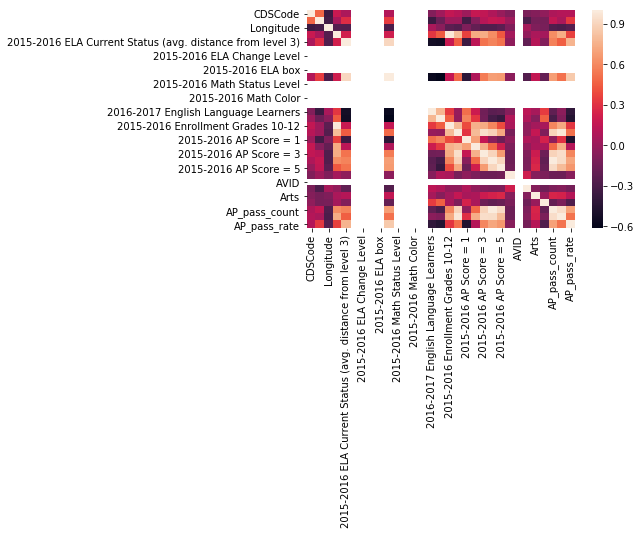

In [407]:
sns.heatmap(hs_df.corr())

In [319]:
hs_df.head()

,CDSCode,District,School,Street,City,*,Phone,OpenDate,Charter,DOCType,...,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,AP_pass_rate
7,37768510129320.0,Bonsall Unified,Bonsall High,7350 West Lilac Road,Bonsall,92003-4316,(760) 631-5209,8/25/2014,N,Unified School District,...,41,40,2431.2,17.5,37.5,55,30,15,40,NaN
13,37679833730447.0,Borrego Springs Unified,Borrego Springs High,2281 Diegueno Road,Borrego Springs,92004-0235,(760) 767-5335,7/1/1980,N,Unified School District,...,17,13,2552.8,7.69,30.77,38.46,38.46,23.08,13,***
51,37735513730694.0,Carlsbad Unified,Carlsbad High,3557 Monroe Street,Carlsbad,92008-2729,(760) 331-5100,7/1/1980,N,Unified School District,...,93,92,2640.7,28.26,50,78.26,17.39,4.35,92,300364298
59,37735510127423.0,Carlsbad Unified,Sage Creek High,3900 Cannon Road,Carlsbad,92010-5573,(760) 331-6600,8/28/2013,N,Unified School District,...,85,83,2444.4,26.51,28.92,55.42,27.71,16.87,83,1138968
109,37680313731478.0,Coronado Unified,Coronado High,650 D Avenue,Coronado,92118-2113,(619) 522-8907,7/1/1980,N,Unified School District,...,107,103,2583.4,17.48,43.69,61.17,21.36,17.48,103,333203145


In [410]:
ml_df = hs_df.copy()

In [411]:
#cast everything to categories
for i in ml_df.columns:
    ml_df[i] = ml_df[i].astype('category').cat.codes.values
ml_df.head()

,CDSCode,District,School,Street,City,*,Phone,OpenDate,Charter,DOCType,...,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,AP_pass_count,AP_total_count,AP_pass_rate
51,65,0,2,41,0,15,40,0,0,2,...,56,33,53,51,14,41,48,53,47,64
59,64,0,50,43,0,17,41,8,0,2,...,23,30,25,30,41,14,45,23,14,58
109,0,1,7,55,2,54,14,0,0,2,...,45,19,49,34,26,15,2,45,39,53
162,1,2,6,30,5,22,43,17,1,1,...,25,34,50,47,57,13,14,29,16,66
163,2,2,9,26,5,28,36,4,0,1,...,50,35,30,35,37,6,17,4,4,25


In [412]:
ml_df.columns

Index(['CDSCode', 'District', 'School', 'Street', 'City', '*', 'Phone',
       'OpenDate', 'Charter', 'DOCType', 'SOCType', 'GSoffered', 'Latitude',
       'Longitude', 'LastUpdate', '2016-2017 Total Enrollment',
       '2015-2016 ELA Current Status (avg. distance from level 3)',
       '2015-2016 ELA Prior Status (age. Distance from level 3)',
       '2015-2016 ELA Change (Difference between current and prior status)',
       '2015-2016 ELA Status Level', '2015-2016 ELA Status Level (Decode)',
       '2015-2016 ELA Change Level', '2015-2016 ELA Change Level (Decode)',
       '2015-2016 ELA Color', '2015-2016 ELA Color (Decode)',
       '2015-2016 ELA box', '2015-2016 ELA box (Decode)',
       '2015-2016 Math Current Status (avg. distance from level 3)',
       '2015-2016 Math Prior Status (age. Distance from level 3)',
       '2015-2016 Math Change (Difference between current and prior status)',
       '2015-2016 Math Status Level', '2015-2016 Math Status Level (Decode)',
       '2015

In [421]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [469]:
def ablation(df,labels):
    good_features = []


    X_train, X_valid, y_train, y_valid = train_test_split(df, labels, test_size=0.2, random_state=0)
    good_features.append('District')
    good_features.append('Charter')
    for i in range(X_train.shape[1]):
        temp_train_x = X_train.reindex(columns=['District', 'Charter'])
        temp_train_x[X_train.columns[i]] = X_train[X_train.columns[i]]
        
        temp_train_x[X_train.columns[i]].replace(to_replace=-1, value=1000, inplace=True)#, limit=None, regex=False, method='pad', axis=None)
        temp_valid_x = X_valid.reindex(columns=['District', 'Charter'])
        
        temp_valid_x[X_valid.columns[i]] = X_valid[X_valid.columns[i]]
        temp_valid_x[X_valid.columns[i]].replace(to_replace=-1, value=1000, inplace=True)
        #temp_valid_x[X_valid.columns[i]] = temp_valid_x[X_valid.columns[i]].fillna(value=50000)
                              
    
    # Create linear regression object
        regr = linear_model.LinearRegression()

    # Train the model using the training sets
        regr.fit(temp_train_x, y_train)
    #(diabetes_X_train, diabetes_y_train)

    # Make predictions using the testing set
        predictions = regr.predict(temp_valid_x)#diabetes_X_test)

    # The coefficients
        #print('Coefficients: \n', regr.coef_)

        print ('Added feature: '+ str(X_train.columns.values[i]))
        print ("\tMSE: %.2f" % + mean_squared_error(y_valid, predictions))
    # Explained variance score: 1 is perfect prediction
        print('\tVariance score: %.2f' % r2_score(y_valid, predictions))
        
        if (mean_squared_error(y_valid, predictions) < 500):
            good_features.append(X_train.columns.values[i])
    return good_features


In [470]:
best_features = ablation(ml_df, ml_df.AP_pass_rate)

Added feature: CDSCode
	MSE: 601.42
	Variance score: -0.22
Added feature: District
	MSE: 556.38
	Variance score: -0.13
Added feature: School
	MSE: 585.15
	Variance score: -0.19
Added feature: Street
	MSE: 563.54
	Variance score: -0.14
Added feature: City
	MSE: 550.99
	Variance score: -0.12
Added feature: *
	MSE: 543.96
	Variance score: -0.10
Added feature: Phone
	MSE: 576.98
	Variance score: -0.17
Added feature: OpenDate
	MSE: 564.19
	Variance score: -0.14
Added feature: Charter
	MSE: 556.38
	Variance score: -0.13
Added feature: DOCType
	MSE: 561.74
	Variance score: -0.14
Added feature: SOCType
	MSE: 556.38
	Variance score: -0.13
Added feature: GSoffered
	MSE: 556.38
	Variance score: -0.13
Added feature: Latitude
	MSE: 549.38
	Variance score: -0.11
Added feature: Longitude
	MSE: 595.32
	Variance score: -0.21
Added feature: LastUpdate
	MSE: 677.29
	Variance score: -0.37
Added feature: 2016-2017 Total Enrollment
	MSE: 482.14
	Variance score: 0.02
Added feature: 2015-2016 ELA Current Stat

In [472]:
print(best_features)
len(best_features)
print(best_features[:13])

['District', 'Charter', '2016-2017 Total Enrollment', '2015-2016 ELA Current Status (avg. distance from level 3)', '2015-2016 ELA Prior Status (age. Distance from level 3)', '2015-2016 Math Current Status (avg. distance from level 3)', '2016-2017 English Language Learners', '2016-2017 FRPM Count', '2015-2016 SAT: AvgScrRead', '2015-2016 SAT: AvgScrMath', '2015-2016 SAT: AvgScrWrit', '2015-2016 SAT: % of Test Takers Whose Total 2015-2016 SAT Scores Are Greater or Equal to 1500', '2015-2016 Enrollment Grades 10-12', '2015-2016 AP Number Tested', '2015-2016 % AP Number Tested', '2015-2016 AP Score = 1', '2015-2016 AP Score = 3', '2015-2016 AP Score = 4', '2015-2016 AP Score = 5', '% 2015-2016 AP Score = 2', '% 2015-2016 AP Score = 3', '% 2015-2016 AP Score = 4', 'US News ', 'AP_pass_count', 'AP_total_count', 'AP_pass_rate']
['District', 'Charter', '2016-2017 Total Enrollment', '2015-2016 ELA Current Status (avg. distance from level 3)', '2015-2016 ELA Prior Status (age. Distance from leve

### Make the model

In [473]:
#TODO reindex columns with features selected


X_train, X_test, y_train, y_test = train_test_split(ml_df.reindex(columns=best_features[:13]), ml_df.AP_pass_rate, test_size=0.2, random_state=0)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [-0.75657954  0.6429682   0.11186596 -0.01513145 -0.08293653  0.63527216
  0.1396482  -0.1091925  -0.18167273 -0.28952044 -0.47687738  1.57263478
  0.12751089]
Mean squared error: 254.68
Variance score: 0.48


In [210]:
schools_df.set_index('SOCType', inplace=True)
schools_df.head()

,CDSCode,District,School,Street,City,*,Phone,OpenDate,Charter,DOCType,...,% 2015-2016 AP Score = 2,% 2015-2016 AP Score = 3,% 2015-2016 AP Score = 4,% 2015-2016 AP Score = 5,IB,AVID,Dual Language,Arts,Education Equity,US News
SOCType,,,,,,,,,,,,,,,,,,,,,
Elementary Schools (Public),37679676037519.0,Alpine Union Elementary,Alpine Elementary,1850 Alpine Boulevard,Alpine,91901-3898,(619) 445-2625,7/1/1980,N,Elementary School District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elementary Schools (Public),37679676109086.0,Alpine Union Elementary,Boulder Oaks Elementary,2320 Tavern Road,Alpine,91901-3134,(619) 445-8676,5/1/1990,N,Elementary School District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elementary Schools (Public),37679676118723.0,Alpine Union Elementary,Creekside Early Learning Center,8818 Harbison Canyon Road,Alpine,91901-2616,(619) 659-8250,8/1/2001,N,Elementary School District,...,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN
Intermediate/Middle Schools (Public),37679676037535.0,Alpine Union Elementary,Joan MacQueen Middle,2001 Tavern Road,Alpine,91901-3129,(619) 445-3245,7/1/1980,N,Elementary School District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alternative Schools of Choice,37679676109953.0,Alpine Union Elementary,Mountain View Learning Academy,8770 Harbison Canyon Road,Alpine,91901-2615,(619) 659-2854,NaN,N,Elementary School District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
#need to convert codes to strings to join with schools_df
math_df['County Code']= math_df['County Code'].astype(str)
math_df['District Code']= math_df['District Code'].astype(str)
math_df['School Code']= math_df['School Code'].astype(str)
ela_df['School Code']= ela_df['School Code'].astype(str)

In [180]:
math_df.dtypes

County Code                           object
District Code                         object
School Code                           object
Total Tested At Entity Level          object
Total Tested with Scores              object
Grade                                  int64
Test Id                               object
CAASPP Reported Enrollment            object
Students Tested                       object
Mean Scale Score                      object
Percentage Standard Exceeded          object
Percentage Standard Met               object
Percentage Standard Met and Above     object
Percentage Standard Nearly Met        object
Percentage Standard Not Met           object
Students with Scores                  object
Unnamed: 16                          float64
dtype: object

In [181]:
math_df['CDSCode'] = math_df['County Code']+ math_df['District Code'] + math_df['School Code']

In [183]:
math_df[['CDSCode']].head()

,CDSCode
0,3775614100511
1,3768452100925
2,3768452100933
3,3773569101071
4,3773569101071


In [184]:
scores_df = math_df.merge(ela_df, how ='outer', on= 'School Code')

In [185]:
print(scores_df.shape)
scores_df.head()

(1337, 33)


,County Code_x,District Code_x,School Code,Total Tested At Entity Level_x,Total Tested with Scores_x,Grade_x,Test Id_x,CAASPP Reported Enrollment_x,Students Tested_x,Mean Scale Score_x,...,Test Id_y,CAASPP Reported Enrollment_y,Students Tested_y,Mean Scale Score_y,Percentage Standard Exceeded_y,Percentage Standard Met_y,Percentage Standard Met and Above_y,Percentage Standard Nearly Met_y,Percentage Standard Not Met_y,Students with Scores_y
0,37,75614,100511,309,309,3,MATH,107,102,2381.1,...,ELA,107,102,2395,16.67,23.53,40.2,21.57,38.24,102
1,37,68452,100925,313,313,3,MATH,111,111,2439.9,...,ELA,111,110,2434,24.55,23.64,48.18,30,21.82,110
2,37,68452,100933,309,309,3,MATH,92,92,2410.5,...,ELA,92,92,2389.9,11.96,20.65,32.61,25,42.39,92
3,37,73569,101071,1089,1071,3,MATH,172,152,2426.9,...,ELA,172,152,2430.5,26,22,48,29.33,22.67,150
4,37,73569,101071,1089,1071,3,MATH,172,152,2426.9,...,ELA,215,197,2580.1,17.53,39.69,57.22,30.41,12.37,194


In [186]:
schools_df.CDSCode = schools_df.CDSCode.apply(lambda x: '{:.0f}'.format(x))

In [187]:
schools_df.CDSCode.head()

0    37679676037519
1    37679676109086
2    37679676118723
3    37679676037535
4    37679676109953
Name: CDSCode, dtype: object

In [188]:
schools_df.CDSCode.nunique()

696

In [163]:
print(schools_df.shape, full_df.shape)

(1000, 69) (1266, 101)


In [162]:
full_df = schools_df.merge(scores_df, how='left', on='CDSCode')
full_df.head()

,CDSCode,District,School,Street,StreetAbr,City,*,State,Phone,OpenDate,...,Test Id_y,CAASPP Reported Enrollment_y,Students Tested_y,Mean Scale Score_y,Percentage Standard Exceeded_y,Percentage Standard Met_y,Percentage Standard Met and Above_y,Percentage Standard Nearly Met_y,Percentage Standard Not Met_y,Students with Scores_y
0,37679676037519,Alpine Union Elementary,Alpine Elementary,1850 Alpine Boulevard,1850 Alpine Blvd.,Alpine,91901-3898,CA,(619) 445-2625,7/1/1980,...,ELA,45,44,2408.7,9.09,20.45,29.55,45.45,25,44
1,37679676109086,Alpine Union Elementary,Boulder Oaks Elementary,2320 Tavern Road,2320 Tavern Rd.,Alpine,91901-3134,CA,(619) 445-8676,5/1/1990,...,ELA,53,53,2426.5,26.42,18.87,45.28,33.96,20.75,53
2,37679676118723,Alpine Union Elementary,Creekside Early Learning Center,8818 Harbison Canyon Road,8818 Harbison Canyon Rd.,Alpine,91901-2616,CA,(619) 659-8250,8/1/2001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37679676037535,Alpine Union Elementary,Joan MacQueen Middle,2001 Tavern Road,2001 Tavern Rd.,Alpine,91901-3129,CA,(619) 445-3245,7/1/1980,...,ELA,191,188,2585.7,18.62,42.55,61.17,26.06,12.77,188
4,37679676109953,Alpine Union Elementary,Mountain View Learning Academy,8770 Harbison Canyon Road,8770 Harbison Canyon Rd.,Alpine,91901-2615,CA,(619) 659-2854,NaN,...,ELA,*,*,*,*,*,*,*,*,*


In [ ]:
2024 Main Street 

In [133]:
print(full_df.shape)

(1266, 101)


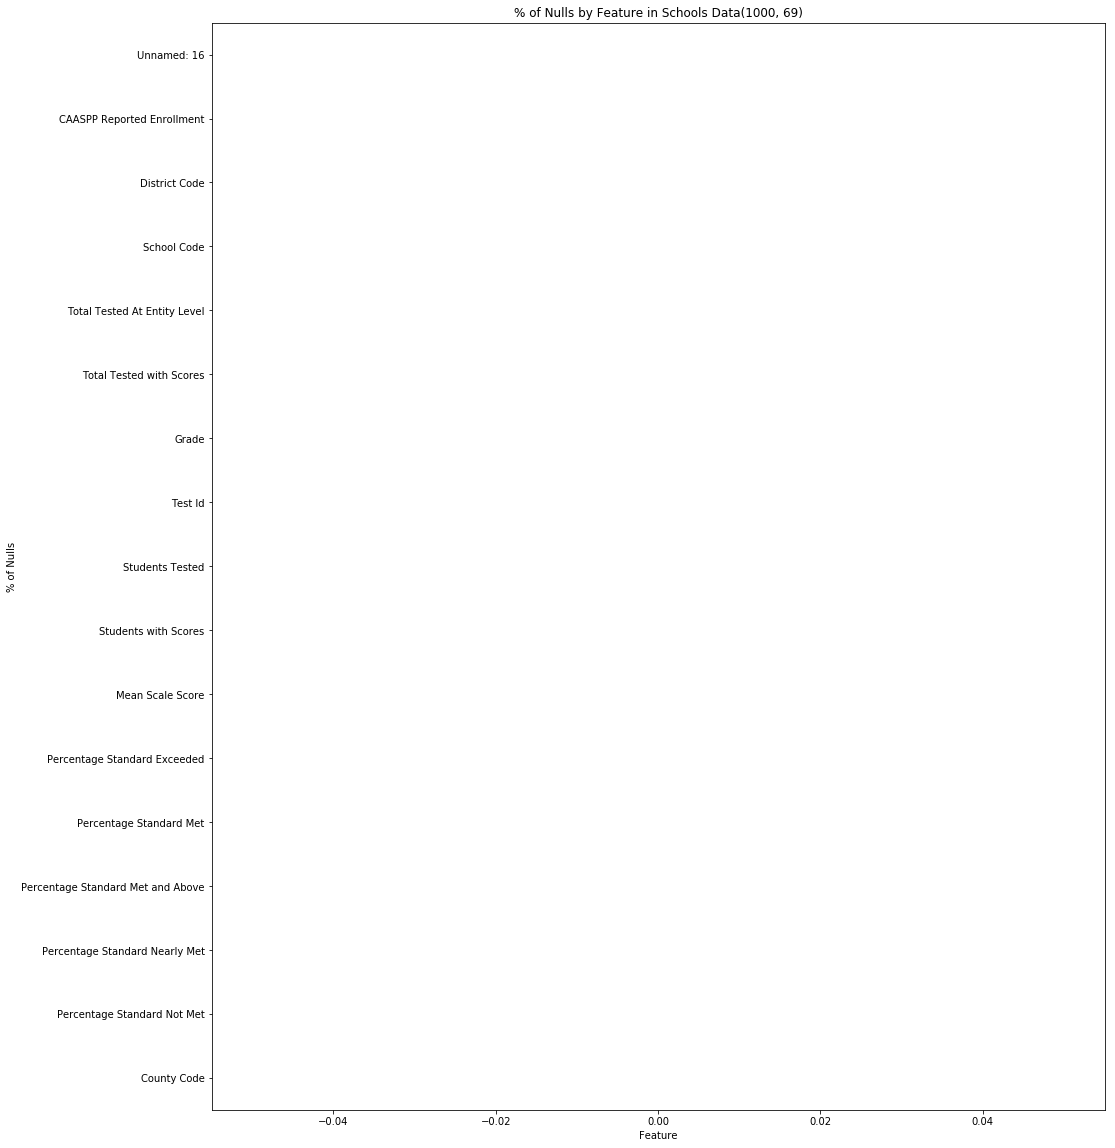

In [155]:
#Determine null values and plot according to features with most null values\n",
null_features_math = math_df.isnull().sum()/len(schools_df)
null_features_math.sort_values(ascending=True).plot(kind='barh', figsize=(16,20))
plt.xlabel('Feature')
plt.ylabel('% of Nulls')
plt.title('% of Nulls by Feature in Schools Data'+str(schools_df.shape))
plt.show()

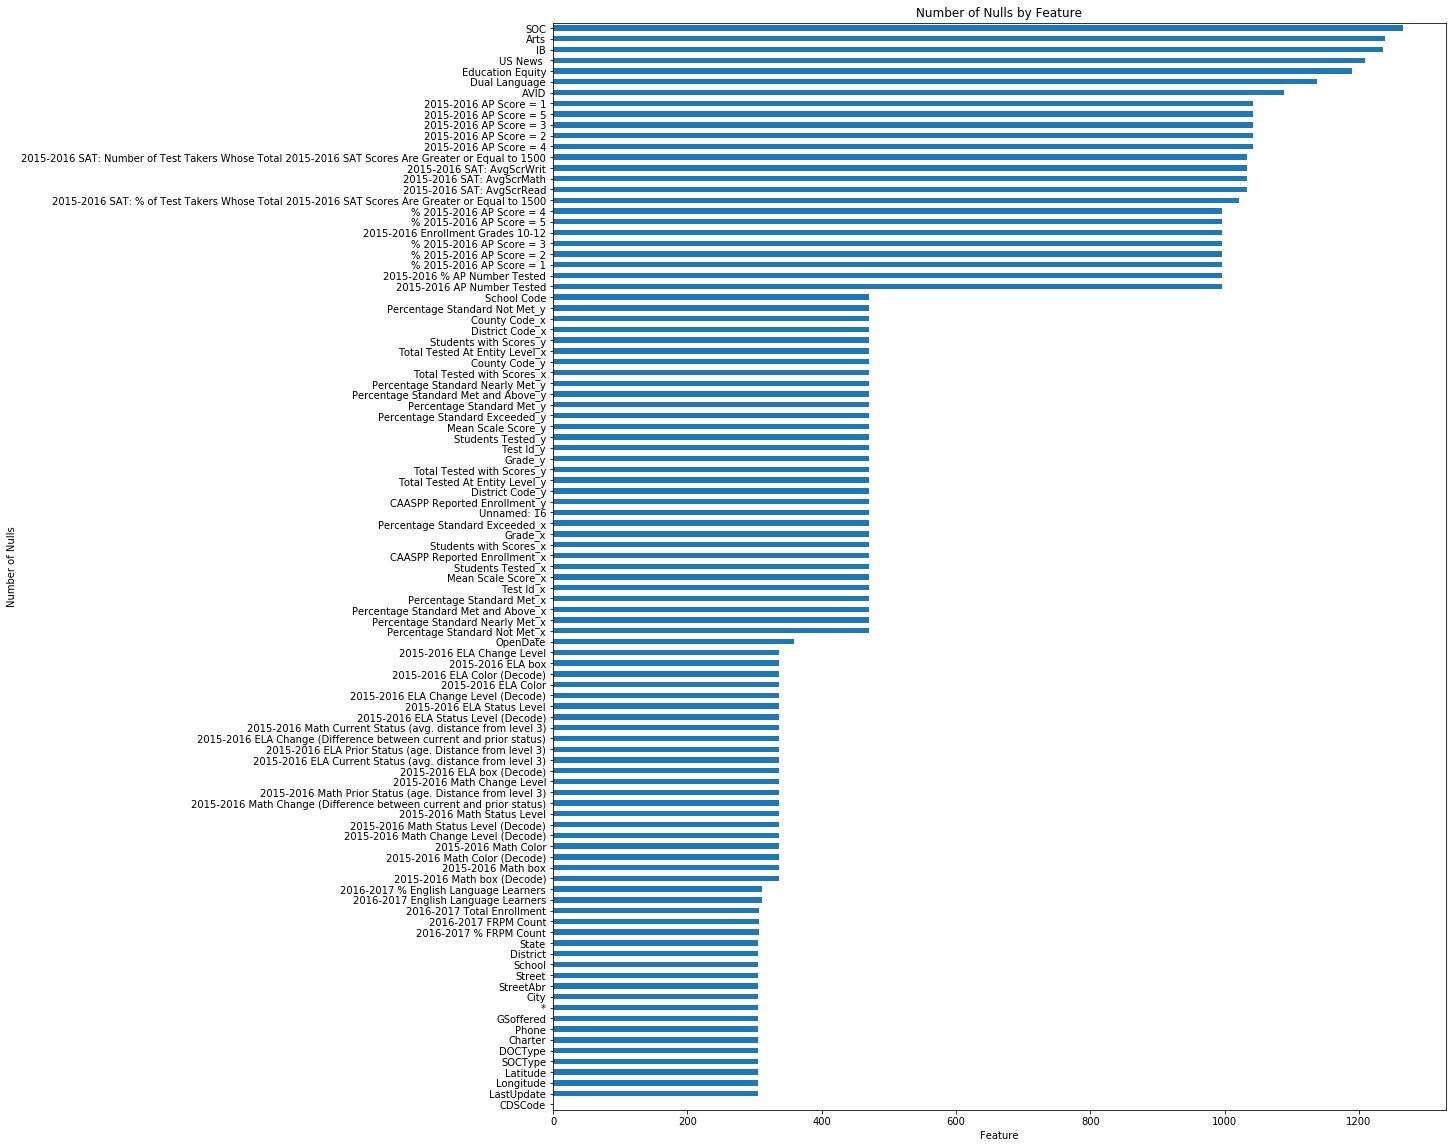

In [137]:
#Determine null values and plot according to features with most null values\n",
null_features = full_df.isnull().sum()
null_features.sort_values(ascending=True).plot(kind='barh', figsize=(16,20))
plt.xlabel('Feature')
plt.ylabel('Number of Nulls')
plt.title('Number of Nulls by Feature')
plt.show()